# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

%matplotlib inline

### Selecting start/end date


In [2]:
start_date = datetime.datetime(2021,4,1)  #April 2021
end_date = datetime.datetime(2023,3,31)   #March 2023

### Creating Object for Stock Price Extraction


In [3]:
def get_stock_price(ticker):
    prices = web.get_data_yahoo(ticker,start_date,end_date)
    prices = prices["Adj Close"].dropna(how="all") 
    return prices


### Creating List of Stocks

Automotive : Tata Motors
Pharmacy : Cipla,Sun Pharma
FMCG : ITC,Britannia
InfoTech : Wipro
Mining : Coal India
Metal : Tata Steel
Power : NTPC
Construction : DLF
Gold ETF : Goldbees 

In [4]:
ticker_list = ['TATAMOTORS.NS', 'CIPLA.NS', 'SUNPHARMA.NS', 'ITC.NS', 'WIPRO.NS', 'BRITANNIA.NS', 'COALINDIA.NS', 'TATASTEEL.NS', 'NTPC.NS', 'DLF.NS', 'GOLDBEES.NS']
portfolio = get_stock_price(ticker_list)
#print(portfolio)

[*********************100%***********************]  11 of 11 completed


In [5]:
portfolio.to_csv("portfolio.csv",index = True)
portfolio = pd.read_csv("portfolio.csv", parse_dates=True, index_col="Date")

### Stock Price Trends

<AxesSubplot:xlabel='Date'>

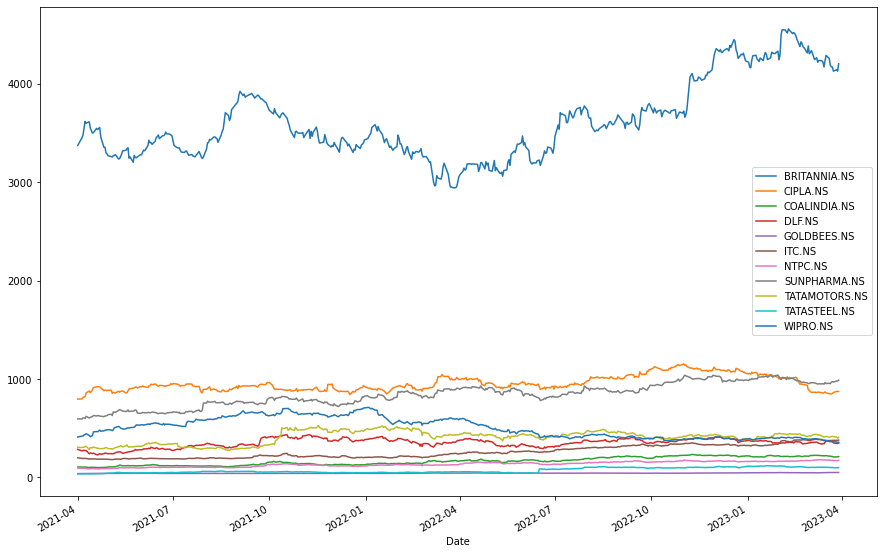

In [6]:
portfolio[portfolio.index >= "2021-04-01"].plot(figsize=(15,10))

### Portfolio Optimization
The variance-covariance matrix is a crucial component in mean-variance portfolio optimization. It describes the relationships between the returns of different assets within a portfolio. The matrix captures both the variance, representing the volatility of individual asset returns, and the covariance, which measures the co-movement between pairs of assets’ returns.

In [7]:
# Importing the PyPortfolioOpt library
import pypfopt                                                  
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(portfolio, frequency = 252)
sample_cov

,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DLF.NS,GOLDBEES.NS,ITC.NS,NTPC.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,WIPRO.NS
BRITANNIA.NS,0.044812,0.003977,0.001544,0.017398,-0.001532,0.011949,0.003151,0.007738,0.012932,0.007640,0.009756
CIPLA.NS,0.003977,0.053336,0.005485,0.009086,-0.000266,0.005792,0.003694,0.019812,0.007604,-0.009278,0.008994
COALINDIA.NS,0.001544,0.005485,0.101092,0.046703,-0.000393,0.019862,0.039377,0.018803,0.043152,0.032263,0.016923
DLF.NS,0.017398,0.009086,0.046703,0.146073,-0.002964,0.030846,0.034276,0.028825,0.083395,0.044040,0.037784
GOLDBEES.NS,-0.001532,-0.000266,-0.000393,-0.002964,0.013282,0.000448,-0.002194,0.000045,-0.004702,0.003335,0.001114
ITC.NS,0.011949,0.005792,0.019862,0.030846,0.000448,0.048769,0.015838,0.011960,0.033356,0.020206,0.014669
NTPC.NS,0.003151,0.003694,0.039377,0.034276,-0.002194,0.015838,0.063834,0.013998,0.034751,0.012548,0.010981
SUNPHARMA.NS,0.007738,0.019812,0.018803,0.028825,0.000045,0.011960,0.013998,0.052274,0.028325,0.018746,0.014277
TATAMOTORS.NS,0.012932,0.007604,0.043152,0.083395,-0.004702,0.033356,0.034751,0.028325,0.154466,0.033658,0.034702
TATASTEEL.NS,0.007640,-0.009278,0.032263,0.044040,0.003335,0.020206,0.012548,0.018746,0.033658,0.655868,0.009148


#### Heat Map
Diagonal : Variance

Rest of the tiles : Co Variance  (dark color means stocks are least similar;helps in risk management)

<AxesSubplot:>

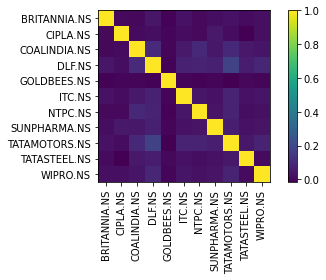

In [8]:
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True)

In [9]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(portfolio)
mu

BRITANNIA.NS     0.124920
CIPLA.NS         0.115137
COALINDIA.NS     0.305505
DLF.NS           0.437925
GOLDBEES.NS      0.025426
ITC.NS           0.207836
NTPC.NS          0.222390
SUNPHARMA.NS     0.208809
TATAMOTORS.NS    0.425776
TATASTEEL.NS     0.747955
WIPRO.NS         0.219355
Name: mkt, dtype: float64

<AxesSubplot:>

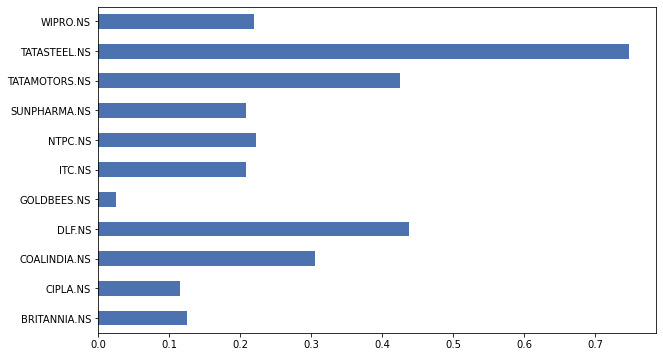

In [10]:
mu.plot.barh(figsize=(10,6))

### Sharpe Ratio and Weight Assignment

In [11]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'BRITANNIA.NS': 0.04946, 'CIPLA.NS': 0.05252, 'COALINDIA.NS': 0.10878, 'DLF.NS': 0.14889, 'GOLDBEES.NS': 0.00657, 'ITC.NS': 0.07702, 'NTPC.NS': 0.08156, 'SUNPHARMA.NS': 0.07997, 'TATAMOTORS.NS': 0.1442, 'TATASTEEL.NS': 0.16723, 'WIPRO.NS': 0.0838}


### Portfolio Performance
A shape ratio greater than one is considered to be acceptable to good for investment. A shape ratio greater than 1.5 is considered extraordinary.

In [12]:
ef.portfolio_performance(verbose=True)

Expected annual return: 36.7%
Annual volatility: 15.9%
Sharpe Ratio: 2.18


(0.3665297691686038, 0.159011198822322, 2.179279017673552)

### Capital Allocation
we had ₹1,00,000 to invest, then based on the weights we calculated in the previous steps and using the current stock prices, we can compute the number of shares of each stock you can purchase within the budget. With the help of DiscreteAllocation class, we can convert the continuous portfolio weights into discrete allocations using integer programming. DiscreteAllocation inputs three values: the continuous weights, the latest stock prices, and the assumed budget. Using the “get_latest_prices” class, we can extract the latest prices, from Yahoo Finance, for the chosen stocks in our portfolio. The output is a dictionary of each stock’s proposed number of shares to purchase and the value of unused funds.

In [13]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

# Number of shares of each stock to purchase
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: \u20B9{:.2f}".format(leftover))

Discrete allocation: {'TATASTEEL.NS': 166, 'DLF.NS': 42, 'TATAMOTORS.NS': 35, 'COALINDIA.NS': 51, 'WIPRO.NS': 23, 'NTPC.NS': 47, 'SUNPHARMA.NS': 8, 'ITC.NS': 20, 'CIPLA.NS': 6, 'BRITANNIA.NS': 1, 'GOLDBEES.NS': 13}
Funds remaining: ₹1462.27


In [14]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.2175025  0.29117118 0.15981576 ... 0.26589821 0.28290485 0.18682701]
Sample portfolio volatilities: 0       0.146397
1       0.172682
2       0.138323
3       0.138798
4       0.170653
          ...   
9995    0.169738
9996    0.172143
9997    0.135004
9998    0.141249
9999    0.138728
Length: 10000, dtype: float64


### Plotting Efficient Frontier

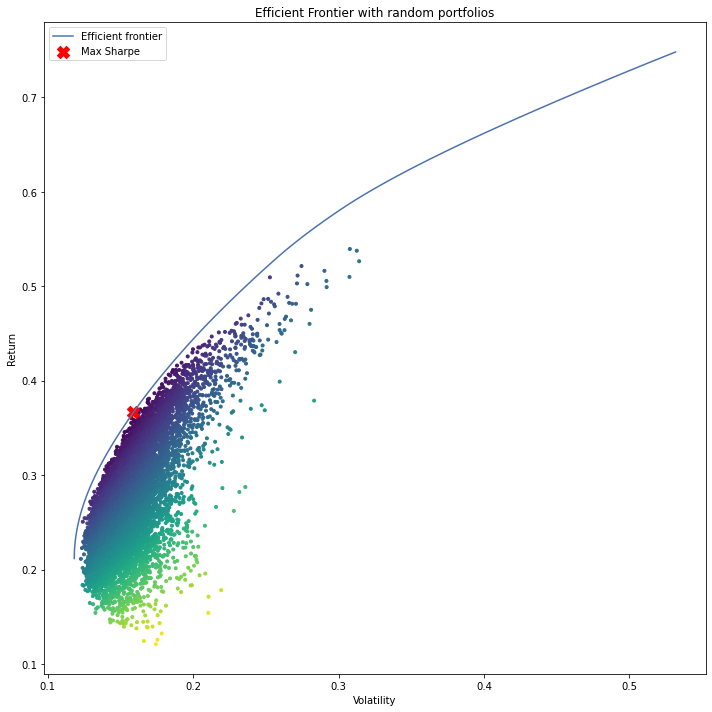

In [15]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize= (10,10))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='red', marker='X',s=150, label= 'Max Sharpe')

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()